In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [80]:
import os ;
os.listdir('/kaggle/input/')

['credit']

# **About Dataset**

### Context
Credit score cards are a common risk control method in the financial industry. It uses personal information and data submitted by credit card applicants to predict the probability of future defaults and credit card borrowings. The bank is able to decide whether to issue a credit card to the applicant. Credit scores can objectively quantify the magnitude of risk.

## Task
Build a machine learning model to predict if an applicant is 'good' or 'bad' client, different from other tasks, the definition of 'good' or 'bad' is not given. You should use some techique, such as vintage analysis to construct you label. Also, unbalance data problem is a big problem in this task.

# Content & Explanation
There're two tables could be merged by ID and the target in the second  data set  :

# application_record.csv
#### Feature name Explanation Remarks
ID: Client number	
CODE_GENDER:Gender	
FLAG_OWN_CAR: Is there a car	
FLAG_OWN_REALTY:Is there a property	
CNT_CHILDREN: Number of children	
AMT_INCOME_TOTAL:Annual income	
NAME_INCOME_TYPE:Income category	
NAME_EDUCATION_TYPE:Education level	
NAME_FAMILY_STATUS:Marital status	
NAME_HOUSING_TYPE:Way of living	
DAYS_BIRTH:Birthday	Count backwards from current day (0), -1 means yesterday

DAYS_EMPLOYED:Start date of employment	Count backwards from current day(0). If positive, it means the person currently unemployed.

FLAG_MOBIL:Is there a mobile phone	
FLAG_WORK_PHONE	Is there a work phone	
FLAG_PHONE:Is there a phone	
FLAG_EMAIL:Is there an email	
OCCUPATION_TYPE:Occupation	
CNT_FAM_MEMBERS:Family size	

# **Credit_record.csv**
#### Feature name Explanation Remarks
ID: Client number

MONTHS_BALANCE: Record monthThe month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on

STATUS: Status 0: 1-29 days past due 1: 30-59 days past due 2: 60-89 days overdue 3: 90-119 days overdue 4: 120-149 days overdue 5: Overdue or bad debts, write-offs for more than 150 days C: paid off that month X: No loan for the month

***THE STATUS IS THE TARGET***

### Read the data set 

In [81]:
df=pd.read_csv('/kaggle/input/credit/Application_Data.csv')
df_real_data=pd.read_csv(r'/kaggle/input/credit/application_record.csv')
Credit=pd.read_csv(r'/kaggle/input/credit/credit_record.csv')
Credit_1=pd.read_csv(r'/kaggle/input/credit/credit_record.csv')

#### **Overview of the data set in the application_record**

In [82]:
df_real_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


***THE STATUS IS THE TARGET***
> I don't margin the data because the data have a lot of duplicated in the first data and have a lot of problems and you will see in the notebook 

In [83]:
Credit.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


#### **Info about the data**

In [84]:
df_real_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

#### **I will check the duplicates in the application_record**

In [85]:
df_real_data.duplicated().sum()

0

### **you can see the data does't have duplicated**

#### But I make a lot of attempts to check the duplicates, and after that, I know the data entry makes a big mistake: he adds 1 to the ID, and the remainder is the same in the data.

## I will drop duplicated the ID is the differnt

In [86]:
pd.options.display.max_rows=10
same_rows_index = df_real_data[df_real_data.iloc[:,1:18].duplicated(keep='first')].index
df_real_data.iloc[same_rows_index,:]
df_real_data.drop(same_rows_index,inplace=True)
df_real_data.reset_index(drop = True, inplace = True)



#### **After  drop the duplicated in the data :**

In [87]:
print("The percentage  of drop the ID duplicated : ",round((438557-df_real_data.shape[0])/438557*100,2))

The percentage  of drop the ID duplicated :  79.46


#### **I will make sort to the data**

In [88]:
df_real_data=df_real_data.sort_values('ID')

In [89]:
df_real_data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,1,Accountants,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88808,7744440,F,N,Y,0,270000.0,Commercial associate,Higher education,Single / not married,House / apartment,-21177,-2870,1,0,1,1,Accountants,1.0
88819,7823595,M,N,Y,0,247500.0,State servant,Higher education,Civil marriage,House / apartment,-16774,-5876,1,0,0,0,NaN,2.0
88820,7836902,F,N,Y,0,315000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-21976,365243,1,0,0,0,NaN,1.0
88816,7965248,F,N,Y,0,103500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-24418,365243,1,0,0,0,NaN,2.0


### Check the NaN values in the data set ?

In [90]:
pd.options.display.max_rows=30
df_real_data.isnull().sum()


ID                         0
CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
DAYS_BIRTH                 0
DAYS_EMPLOYED              0
FLAG_MOBIL                 0
FLAG_WORK_PHONE            0
FLAG_PHONE                 0
FLAG_EMAIL                 0
OCCUPATION_TYPE        27477
CNT_FAM_MEMBERS            0
dtype: int64

In [91]:
pd.options.display.max_rows=10


# Why are we droping these features?¶
**ID**: ID is not useful for prediction, it helped us when we were merging the two datasets but after that, there is no need to keep it.

**FLAG_PHONE**: Since everyone has a mobile phone, this feature does not inform us about anything.

**OCCUPATION_TYPE**: Has some missing values and the count of each category is not very different to justify the use of mode. So we drop it.
Account age:this information is unknown while applying for a credit card **but I will try to full the nan with KNN algorithm.**

### I drop Has a phone due to is constant feature  

In [92]:
df_real_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,90085.0,5.907760e+06,517295.769223,5008804.0,5465838.0,5952121.0,6289034.0,7995770.0
CNT_CHILDREN,90085.0,4.238108e-01,0.726697,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,90085.0,1.787001e+05,102462.973043,26100.0,112500.0,157500.0,225000.0,6750000.0
DAYS_BIRTH,90085.0,-1.590161e+04,4255.481856,-25201.0,-19429.0,-15566.0,-12339.0,-7489.0
DAYS_EMPLOYED,90085.0,6.158952e+04,139450.235347,-17531.0,-2870.0,-1299.0,-324.0,365243.0
FLAG_MOBIL,90085.0,1.000000e+00,0.000000,1.0,1.0,1.0,1.0,1.0
FLAG_WORK_PHONE,90085.0,2.029528e-01,0.402200,0.0,0.0,0.0,0.0,1.0
FLAG_PHONE,90085.0,2.744963e-01,0.446263,0.0,0.0,0.0,1.0,1.0
FLAG_EMAIL,90085.0,1.002276e-01,0.300305,0.0,0.0,0.0,0.0,1.0
CNT_FAM_MEMBERS,90085.0,2.177288e+00,0.904672,1.0,2.0,2.0,3.0,20.0


**you can see the Flag mobile is constant feature because the mean=min=max=25%=50%=75%=1**

In [93]:
df_real_data.drop(['FLAG_PHONE'],axis=1,inplace=True)

#### **I think I will drop the OCCUPATION TYPE but before do this I will try to fill the nan**

In [94]:
df_real_data['OCCUPATION_TYPE'].unique()

array([nan, 'Security staff', 'Sales staff', 'Accountants', 'Laborers',
       'Managers', 'Drivers', 'Core staff', 'High skill tech staff',
       'Cleaning staff', 'Private service staff', 'Cooking staff',
       'Low-skill Laborers', 'Medicine staff', 'Secretaries',
       'Waiters/barmen staff', 'HR staff', 'Realty agents', 'IT staff'],
      dtype=object)

# **Encoder** 

### **I will repalce the M to 0 and F to 1**

In [95]:
df_real_data.replace({'M':0,'F':1,'Y':0,'N':1},inplace=True)

#### **I draw some graphs to help me an encoder and predict the nan**

###### This graph between the **OCCUPATION_TYPE** and **AMT_INCOME_TOTAL**

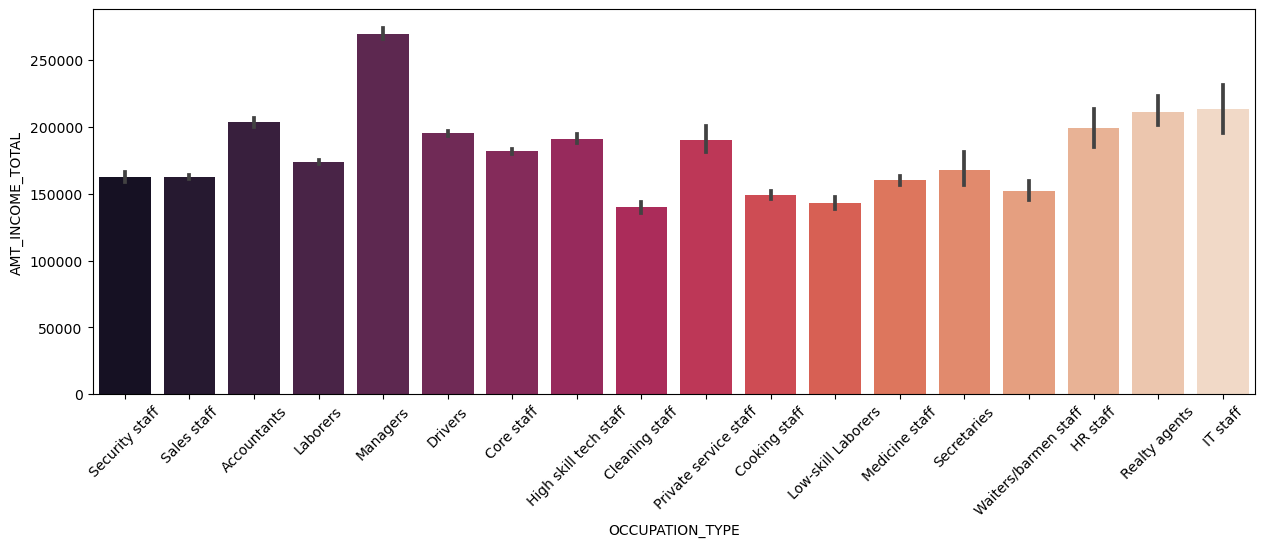

In [96]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
sns.barplot(x=df_real_data['OCCUPATION_TYPE'],y=df_real_data['AMT_INCOME_TOTAL'],palette="rocket");

##### **Encoder to the OCCUPATION_TYPE**

In [97]:
df_real_data['OCCUPATION_TYPE_1']=df_real_data['OCCUPATION_TYPE']

In [98]:
df_real_data['OCCUPATION_TYPE'].isna().sum()

27477

In [99]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df_real_data['OCCUPATION_TYPE']= label_encoder.fit_transform(df_real_data['OCCUPATION_TYPE'])
df_real_data['OCCUPATION_TYPE'].unique()

array([18, 16, 14,  0,  8, 10,  4,  3,  6,  1, 12,  2,  9, 11, 15, 17,  5,
       13,  7])

In [100]:
df_real_data['OCCUPATION_TYPE'].value_counts()

18    27477
8     16624
14     9123
3      8091
10     6675
      ...  
15      412
17      393
13      218
5       167
7       125
Name: OCCUPATION_TYPE, Length: 19, dtype: int64

##### **Encoder to the NAME_FAMILY_STATUS**


In [101]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df_real_data['NAME_FAMILY_STATUS']= label_encoder.fit_transform(df_real_data['NAME_FAMILY_STATUS'])
df_real_data['NAME_FAMILY_STATUS'].unique()

array([0, 1, 3, 2, 4])

###### This graph between the **NAME_INCOME_TYPE** and **AMT_INCOME_TOTAL**


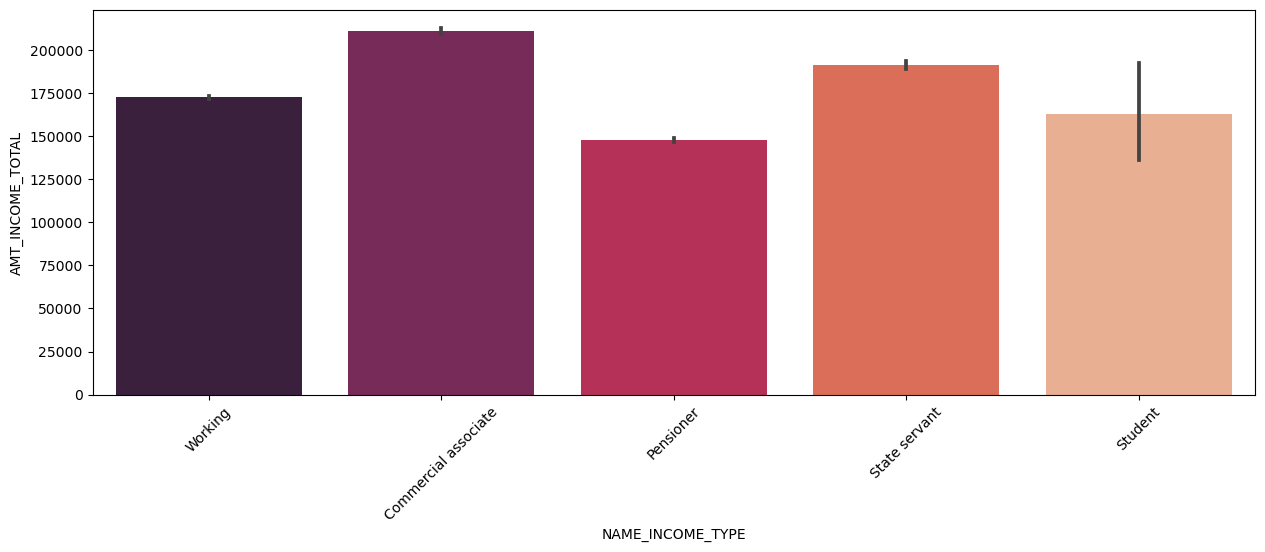

In [102]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
sns.barplot(x=df_real_data['NAME_INCOME_TYPE'],y=df_real_data['AMT_INCOME_TOTAL'],palette="rocket");

##### **Encoder to the NAME_INCOME_TYPE**


**The draw the graph to make OrdinalEncoder**

In [103]:
from sklearn.preprocessing import OrdinalEncoder
Rank=['Pensioner','Student','State servant','Working','Commercial associate']
le=OrdinalEncoder(categories=[Rank])
df_real_data['NAME_INCOME_TYPE']=le.fit_transform(df_real_data[['NAME_INCOME_TYPE']])
df_real_data['NAME_INCOME_TYPE'].unique()

array([3., 4., 0., 2., 1.])

##### **Encoder to the NAME_HOUSING_TYPE**


In [104]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df_real_data['NAME_HOUSING_TYPE']= label_encoder.fit_transform(df_real_data['NAME_HOUSING_TYPE'])
df_real_data['NAME_HOUSING_TYPE'].unique()

array([4, 1, 2, 5, 0, 3])

##### **Encoder to the NAME_EDUCATION_TYPE**


In [105]:
from sklearn.preprocessing import OrdinalEncoder
Rank=['Lower secondary','Secondary / secondary special','Incomplete higher','Higher education','Academic degree']
le=OrdinalEncoder(categories=[Rank])
df_real_data['NAME_EDUCATION_TYPE']=le.fit_transform(df_real_data[['NAME_EDUCATION_TYPE']])

In [106]:
df_real_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,OCCUPATION_TYPE_1
0,5008804,0,0,0,0,427500.0,3.0,3.0,0,4,-12005,-4542,1,1,0,18,2.0,NaN
1,5008806,0,0,0,0,112500.0,3.0,1.0,1,1,-21474,-1134,1,0,0,16,2.0,Security staff
2,5008808,1,1,0,0,270000.0,4.0,1.0,3,1,-19110,-3051,1,0,1,14,1.0,Sales staff
3,5008812,1,1,0,0,283500.0,0.0,3.0,2,1,-22464,365243,1,0,0,18,1.0,NaN
4,5008815,0,0,0,0,270000.0,3.0,3.0,1,1,-16872,-769,1,1,1,0,2.0,Accountants


#### Check the outliers in the data 

##### by logic I drop or replace  the value 365243 day 

In [107]:
df_real_data['DAYS_EMPLOYED'].value_counts(normalize=True)*100

 365243    17.413554
-218        0.068824
-430        0.067714
-231        0.065494
-232        0.058833
             ...    
-14278      0.001110
-12632      0.001110
-9287       0.001110
-13578      0.001110
-11272      0.001110
Name: DAYS_EMPLOYED, Length: 9406, dtype: float64

#### **I will change the outliers and fill by upper whisker**

why  because I need the data

In [108]:
q1 = df_real_data['DAYS_EMPLOYED'].quantile(0.25)
q3 = df_real_data['DAYS_EMPLOYED'].quantile(0.75)
iqr = q3 - q1
lower_whisker = q1 - 1.5 * iqr
upper_whisker = q3 + 1.5 * iqr
print(upper_whisker)

3495.0


#### This is for loop used to drop the continuous outliers

In [109]:
column=['AMT_INCOME_TOTAL','DAYS_BIRTH']
for col in column:
    q1 = df_real_data[col].quantile(0.25)
    q3 = df_real_data[col].quantile(0.75)
    iqr = q3 - q1
    lower_whisker = q1 - 1.5 * iqr
    upper_whisker = q3 + 1.5 * iqr
    print(upper_whisker)
    filt_lower = df_real_data[col] < lower_whisker
    filt_upper = df_real_data[col] > upper_whisker
    filt = filt_lower | filt_upper
    outlier_indices = df_real_data[filt].index
    df_real_data.drop(outlier_indices, axis = 0, inplace = True)



393750.0
-1598.0


##### **I replace the value of 365243 to  3495.0 becaue I need data**

In [110]:
df_real_data['DAYS_EMPLOYED'].replace(365243,3495,inplace=True)

#### **I drop some row and the trh is number of feture**

In [111]:
columns =[
 'NAME_INCOME_TYPE',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'FLAG_EMAIL']
for i in columns:
    true=df_real_data[i].value_counts()<=17
    print(true[true])
    
    

1.0    True
Name: NAME_INCOME_TYPE, dtype: bool
Series([], Name: OCCUPATION_TYPE, dtype: bool)
9.0     True
8.0     True
15.0    True
20.0    True
11.0    True
14.0    True
Name: CNT_FAM_MEMBERS, dtype: bool
Series([], Name: FLAG_EMAIL, dtype: bool)


#### This is the loop used to drop the categorical  outliers

In [112]:
columns =[
 'NAME_INCOME_TYPE',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'FLAG_EMAIL']
for i in columns:
    series = df_real_data[i].value_counts()
    filt = series < 17 # the  threshold 
    outliers = filt[filt].index
    func = lambda x: x in outliers
    filt = df_real_data[i].apply(func)
    outlier_indices = filt[filt].index
    df_real_data.drop(outlier_indices, inplace = True)
    df_real_data.reset_index(drop = True, inplace = True)

In [113]:
df_real_data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,OCCUPATION_TYPE_1
0,5008806,0,0,0,0,112500.0,3.0,1.0,1,1,-21474,-1134,1,0,0,16,2.0,Security staff
1,5008808,1,1,0,0,270000.0,4.0,1.0,3,1,-19110,-3051,1,0,1,14,1.0,Sales staff
2,5008812,1,1,0,0,283500.0,0.0,3.0,2,1,-22464,3495,1,0,0,18,1.0,NaN
3,5008815,0,0,0,0,270000.0,3.0,3.0,1,1,-16872,-769,1,1,1,0,2.0,Accountants
4,5008819,0,0,0,0,135000.0,4.0,1.0,1,1,-17778,-1194,1,0,0,8,2.0,Laborers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87328,7744440,1,1,0,0,270000.0,4.0,3.0,3,1,-21177,-2870,1,0,1,0,1.0,Accountants
87329,7823595,0,1,0,0,247500.0,2.0,3.0,0,1,-16774,-5876,1,0,0,18,2.0,NaN
87330,7836902,1,1,0,0,315000.0,0.0,1.0,2,1,-21976,3495,1,0,0,18,1.0,NaN
87331,7965248,1,1,0,0,103500.0,0.0,1.0,1,1,-24418,3495,1,0,0,18,2.0,NaN


#### **Covert *DAYS_BIRTH* to the year and I change name to *Applicant_Age***

In [114]:
df_real_data["Applicant_Age"]=abs(round(df_real_data["DAYS_BIRTH"]/365))

#### **Covert *DAYS_EMPLOYED* to the year and I change name to *Years_of_Working***

In [115]:
df_real_data["Years_of_Working"]=abs(round(df_real_data["DAYS_EMPLOYED"]/365))


##### **I replace the 10 years with 0 because he doesn't work to understand go the  explain feature**

In [116]:
df_real_data['Years_of_Working'].replace({10.0:0},inplace=True)

In [117]:
df_real_data[df_real_data['DAYS_EMPLOYED']==3495]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,OCCUPATION_TYPE_1,Applicant_Age,Years_of_Working
2,5008812,1,1,0,0,283500.0,0.0,3.0,2,1,-22464,3495,1,0,0,18,1.0,NaN,62.0,0.0
6,5008827,0,0,0,0,180000.0,0.0,3.0,1,1,-18772,3495,1,0,0,18,2.0,NaN,51.0,0.0
15,5008884,1,1,0,0,315000.0,0.0,1.0,4,1,-20186,3495,1,0,0,18,1.0,NaN,55.0,0.0
23,5008974,1,1,0,0,112500.0,0.0,1.0,1,1,-22319,3495,1,0,0,18,2.0,NaN,61.0,0.0
33,5009033,1,1,1,0,255150.0,0.0,2.0,0,4,-18682,3495,1,0,0,18,2.0,NaN,51.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87310,6842847,1,0,0,0,112500.0,0.0,3.0,3,1,-17018,3495,1,0,1,18,1.0,NaN,47.0,0.0
87321,7559185,1,1,0,0,112500.0,0.0,1.0,3,1,-23140,3495,1,0,0,18,1.0,NaN,63.0,0.0
87323,7583486,1,1,0,0,135000.0,0.0,1.0,4,2,-22834,3495,1,0,0,18,1.0,NaN,63.0,0.0
87330,7836902,1,1,0,0,315000.0,0.0,1.0,2,1,-21976,3495,1,0,0,18,1.0,NaN,60.0,0.0


##### After that I make other column he works or not

In [118]:
df_real_data['IS_EMPLOYED']=df_real_data['DAYS_EMPLOYED'].replace({3495:0,range(-17531,3490):1})

In [119]:
df_real_data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,OCCUPATION_TYPE_1,Applicant_Age,Years_of_Working,IS_EMPLOYED
0,5008806,0,0,0,0,112500.0,3.0,1.0,1,1,...,-1134,1,0,0,16,2.0,Security staff,59.0,3.0,1
1,5008808,1,1,0,0,270000.0,4.0,1.0,3,1,...,-3051,1,0,1,14,1.0,Sales staff,52.0,8.0,1
2,5008812,1,1,0,0,283500.0,0.0,3.0,2,1,...,3495,1,0,0,18,1.0,NaN,62.0,0.0,0
3,5008815,0,0,0,0,270000.0,3.0,3.0,1,1,...,-769,1,1,1,0,2.0,Accountants,46.0,2.0,1
4,5008819,0,0,0,0,135000.0,4.0,1.0,1,1,...,-1194,1,0,0,8,2.0,Laborers,49.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87328,7744440,1,1,0,0,270000.0,4.0,3.0,3,1,...,-2870,1,0,1,0,1.0,Accountants,58.0,8.0,1
87329,7823595,0,1,0,0,247500.0,2.0,3.0,0,1,...,-5876,1,0,0,18,2.0,NaN,46.0,16.0,1
87330,7836902,1,1,0,0,315000.0,0.0,1.0,2,1,...,3495,1,0,0,18,1.0,NaN,60.0,0.0,0
87331,7965248,1,1,0,0,103500.0,0.0,1.0,1,1,...,3495,1,0,0,18,2.0,NaN,67.0,0.0,0


In [120]:
df_real_data.drop('DAYS_BIRTH',axis=1,inplace=True)

In [121]:
df_real_data.drop('DAYS_EMPLOYED',axis=1,inplace=True)

In [122]:
pd.options.display.max_rows=10
df_real_data.isnull().sum()

ID                       0
CODE_GENDER              0
FLAG_OWN_CAR             0
FLAG_OWN_REALTY          0
CNT_CHILDREN             0
                     ...  
CNT_FAM_MEMBERS          0
OCCUPATION_TYPE_1    26831
Applicant_Age            0
Years_of_Working         0
IS_EMPLOYED              0
Length: 19, dtype: int64

## **Fill nan in data**

**Now I will Enter the data to model to predict the nun**

Copy the data

In [123]:
df_f_nan=df_real_data.copy(deep = True)

In [124]:
df_f_nan.drop(['ID','OCCUPATION_TYPE_1'],axis=1,inplace=True)

In [125]:
df_f_nan['OCCUPATION_TYPE']=df_f_nan['OCCUPATION_TYPE'].replace({18:np.nan})

In [126]:
df_f_nan

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Applicant_Age,Years_of_Working,IS_EMPLOYED
0,0,0,0,0,112500.0,3.0,1.0,1,1,1,0,0,16.0,2.0,59.0,3.0,1
1,1,1,0,0,270000.0,4.0,1.0,3,1,1,0,1,14.0,1.0,52.0,8.0,1
2,1,1,0,0,283500.0,0.0,3.0,2,1,1,0,0,NaN,1.0,62.0,0.0,0
3,0,0,0,0,270000.0,3.0,3.0,1,1,1,1,1,0.0,2.0,46.0,2.0,1
4,0,0,0,0,135000.0,4.0,1.0,1,1,1,0,0,8.0,2.0,49.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87328,1,1,0,0,270000.0,4.0,3.0,3,1,1,0,1,0.0,1.0,58.0,8.0,1
87329,0,1,0,0,247500.0,2.0,3.0,0,1,1,0,0,NaN,2.0,46.0,16.0,1
87330,1,1,0,0,315000.0,0.0,1.0,2,1,1,0,0,NaN,1.0,60.0,0.0,0
87331,1,1,0,0,103500.0,0.0,1.0,1,1,1,0,0,NaN,2.0,67.0,0.0,0


Know I Enter the data KNN Imputer

In [127]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
After_imputation = imputer.fit_transform(df_f_nan)

In [128]:
df_imputed = pd.DataFrame(After_imputation, columns=df_f_nan.columns)
df_imputed['OCCUPATION_TYPE'].value_counts()

8.0     17381
14.0     8986
3.0      7890
10.0     6245
4.0      6038
        ...  
1.2         4
0.6         1
14.6        1
15.2        1
14.8        1
Name: OCCUPATION_TYPE, Length: 77, dtype: int64

**I will but the OCCUPATION_TYPE in my data df_real_data**

In [129]:
df_real_data.insert(6, "OCCUPATION_TYPE_NaN", df_imputed['OCCUPATION_TYPE'], True)


In [130]:
df_real_data.drop(['OCCUPATION_TYPE_1','OCCUPATION_TYPE'],axis=1 ,inplace=True)

### **This is the data application_record after drop nan ,outliers,duplicated**

In [131]:
df_real_data.to_csv('data_after_clean.csv', index=False)

In [132]:
df_real_data=pd.read_csv('data_after_clean.csv')

### **Now I start work to the Credit data and this data have the target**

In [133]:
Credit=Credit.sort_values('ID')

In [134]:
Credit

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
22,5001712,-18,0
...,...,...,...
1048547,5150487,-2,C
1048546,5150487,-1,C
1048545,5150487,0,C
1048558,5150487,-13,C


In [135]:
Credit['STATUS2']=Credit['STATUS'].copy()

#### **X,C,0  is Good Debt and 1,2,3,4,5 is bad Debt**

In [136]:
Credit['STATUS2'].replace(['X','C','0'],'Good Debt',inplace=True)


In [137]:
Credit['STATUS2'].replace(['1','2','3','4','5'],'Bad Debt',inplace=True)


In [138]:
Credit['Good_Debt']=Credit['STATUS2'].copy()
Credit['Bad_Debt']=Credit['STATUS2'].copy()

In [139]:
Credit['STATUS2'].value_counts()

Good Debt    1034381
Bad Debt       14194
Name: STATUS2, dtype: int64

In [140]:
Credit['Good_Debt'].value_counts()

Good Debt    1034381
Bad Debt       14194
Name: Good_Debt, dtype: int64

**I Replace Good_Debt  with 1 and bad Debt to 0**

In [141]:
Credit['Good_Debt'].replace({'Good Debt':1,'Bad Debt':0},inplace=True)
Credit['Bad_Debt'].replace({'Good Debt':0,'Bad Debt':1},inplace=True)


In [142]:
Credit['Good_Debt'].value_counts()

1    1034381
0      14194
Name: Good_Debt, dtype: int64

In [143]:
Credit=Credit.groupby('ID').sum()

/tmp/ipykernel_28/3068118717.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Credit=Credit.groupby('ID').sum()


In [144]:
Credit['Bad_Debt'].value_counts()

0     40635
1      2766
2      1094
3       507
4       282
      ...  
39        1
38        1
31        1
34        1
29        1
Name: Bad_Debt, Length: 43, dtype: int64

**If Good Debt in the account more the Bad Debt is account is good=1 els Dad Debt more than good is account Dad=1** 

In [145]:
Credit['Status_1']=None
Credit['Status_1'][Credit['Good_Debt']>Credit['Bad_Debt']]=1
Credit['Status_1'][Credit['Good_Debt']<=Credit['Bad_Debt']]=0



/tmp/ipykernel_28/1521871349.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Credit['Status_1'][Credit['Good_Debt']>Credit['Bad_Debt']]=1
/tmp/ipykernel_28/1521871349.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Credit['Status_1'][Credit['Good_Debt']<=Credit['Bad_Debt']]=0


In [146]:
Credit['Status_1'].unique()

array([1, 0], dtype=object)

In [147]:
Credit.drop('MONTHS_BALANCE',axis=1,inplace=True)


### **Make group by to the Credit_1**

In [148]:
df_grouped=Credit_1.groupby('ID')

In [149]:
pivot_tb=Credit_1.pivot(index='ID',columns='MONTHS_BALANCE',values='STATUS')

### **generate the feature from the credit**

###  feature first open_month 

In [150]:
pivot_tb['open_month'] = df_grouped['MONTHS_BALANCE'].max()

###  feature 2 end_month 

In [151]:
pivot_tb['end_month'] = df_grouped['MONTHS_BALANCE'].min()

###  feature 3 period 

In [152]:
pivot_tb['period'] = pivot_tb['open_month'] -pivot_tb['end_month']

In [153]:
credit = pd.merge(Credit_1, pivot_tb, on = 'ID', how = 'left')

In [154]:
credit=credit[['ID','open_month','end_month','period']]

## **Grouby to the Credit**

In [155]:
credit=credit.groupby('ID').agg({'open_month':'first','end_month':'first','period':'first'})

In [156]:
credit

,open_month,end_month,period
ID,,,
5001711,0,-3,3
5001712,0,-18,18
5001713,0,-21,21
5001714,0,-14,14
5001715,0,-59,59
...,...,...,...
5150482,-11,-28,17
5150483,0,-17,17
5150484,0,-12,12


In [157]:
Credit

,Good_Debt,Bad_Debt,Status_1
ID,,,
5001711,4,0,1
5001712,19,0,1
5001713,22,0,1
5001714,15,0,1
5001715,60,0,1
...,...,...,...
5150482,18,0,1
5150483,18,0,1
5150484,13,0,1


In [158]:
Credit=pd.merge(Credit,credit,on='ID')

In [159]:
Credit.rename(columns={'Good_Debt':'Total_Good_Debt','Bad_Debt':'Total_Bad_Debt','Status_1':'Status'},inplace=True)

In [160]:
Credit['Status'].unique()

array([1, 0], dtype=object)

In [161]:
Credit['ID']=Credit.index

In [162]:
Credit

,Total_Good_Debt,Total_Bad_Debt,Status,open_month,end_month,period,ID
ID,,,,,,,
5001711,4,0,1,0,-3,3,5001711
5001712,19,0,1,0,-18,18,5001712
5001713,22,0,1,0,-21,21,5001713
5001714,15,0,1,0,-14,14,5001714
5001715,60,0,1,0,-59,59,5001715
...,...,...,...,...,...,...,...
5150482,18,0,1,-11,-28,17,5150482
5150483,18,0,1,0,-17,17,5150483
5150484,13,0,1,0,-12,12,5150484


In [163]:
Credit.reset_index(drop=True,inplace=True)

In [164]:
Credit

,Total_Good_Debt,Total_Bad_Debt,Status,open_month,end_month,period,ID
0,4,0,1,0,-3,3,5001711
1,19,0,1,0,-18,18,5001712
2,22,0,1,0,-21,21,5001713
3,15,0,1,0,-14,14,5001714
4,60,0,1,0,-59,59,5001715
...,...,...,...,...,...,...,...
45980,18,0,1,-11,-28,17,5150482
45981,18,0,1,0,-17,17,5150483
45982,13,0,1,0,-12,12,5150484
45983,2,0,1,0,-1,1,5150485


In [165]:
Credit.columns

Index(['Total_Good_Debt', 'Total_Bad_Debt', 'Status', 'open_month',
       'end_month', 'period', 'ID'],
      dtype='object')

In [166]:
Credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45985 entries, 0 to 45984
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Total_Good_Debt  45985 non-null  int64 
 1   Total_Bad_Debt   45985 non-null  int64 
 2   Status           45985 non-null  object
 3   open_month       45985 non-null  int64 
 4   end_month        45985 non-null  int64 
 5   period           45985 non-null  int64 
 6   ID               45985 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 2.5+ MB


In [167]:
Credit['open_month']=abs(Credit['open_month'])
Credit['end_month']=abs(Credit['end_month'])
Credit['period']=abs(Credit['period'])


In [168]:
Credit

,Total_Good_Debt,Total_Bad_Debt,Status,open_month,end_month,period,ID
0,4,0,1,0,3,3,5001711
1,19,0,1,0,18,18,5001712
2,22,0,1,0,21,21,5001713
3,15,0,1,0,14,14,5001714
4,60,0,1,0,59,59,5001715
...,...,...,...,...,...,...,...
45980,18,0,1,11,28,17,5150482
45981,18,0,1,0,17,17,5150483
45982,13,0,1,0,12,12,5150484
45983,2,0,1,0,1,1,5150485


In [169]:
pd.options.display.max_columns=None
df_6=pd.merge(df_real_data,Credit,on='ID')

## **This is the final data set**

In [170]:
df_6

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,OCCUPATION_TYPE_NaN,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,Applicant_Age,Years_of_Working,IS_EMPLOYED,Total_Good_Debt,Total_Bad_Debt,Status,open_month,end_month,period
0,5008806,0,0,0,0,112500.0,16.0,3.0,1.0,1,1,1,0,0,2.0,59.0,3.0,1,30,0,1,0,29,29
1,5008808,1,1,0,0,270000.0,14.0,4.0,1.0,3,1,1,0,1,1.0,52.0,8.0,1,5,0,1,0,4,4
2,5008812,1,1,0,0,283500.0,6.2,0.0,3.0,2,1,1,0,0,1.0,62.0,0.0,0,17,0,1,4,20,16
3,5008815,0,0,0,0,270000.0,0.0,3.0,3.0,1,1,1,1,1,2.0,46.0,2.0,1,6,0,1,0,5,5
4,5008819,0,0,0,0,135000.0,8.0,4.0,1.0,1,1,1,0,0,2.0,49.0,3.0,1,8,0,1,10,17,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9380,5150428,0,0,0,0,112500.0,11.0,3.0,1.0,3,1,1,1,0,1.0,27.0,5.0,1,9,0,1,5,13,8
9381,5150451,1,1,0,1,135000.0,11.0,3.0,1.0,1,1,1,0,0,3.0,45.0,24.0,1,5,0,1,0,4,4
9382,5150459,1,0,0,1,112500.0,3.0,3.0,1.0,1,1,1,0,0,3.0,39.0,1.0,1,47,5,1,0,51,51
9383,5150467,1,1,0,0,180000.0,2.0,3.0,1.0,1,1,1,0,0,2.0,49.0,7.0,1,7,0,1,46,52,6


In [171]:
df['Status'].value_counts()

1    25007
0      121
Name: Status, dtype: int64

In [172]:
df_6['Status'].value_counts()

1    9333
0      52
Name: Status, dtype: int64

In [173]:
df_6['Status'].unique()

array([1, 0], dtype=object)

In [174]:
df_6.rename(columns={'CODE_GENDER':'Applicant_Gender','FLAG_OWN_REALTY':'Owned_Realty','CNT_CHILDREN':'Total_Children','AMT_INCOME_TOTAL':'Total_Income','NAME_INCOME_TYPE':'Income_Type'},inplace=True)

In [175]:
df_6.rename(columns={'NAME_EDUCATION_TYPE':'Education_Type','NAME_FAMILY_STATUS':'Family_Status','NAME_HOUSING_TYPE':'Housing_Type'},inplace=True)

In [176]:
df_6.rename(columns={'FLAG_MOBIL':'Owned_Mobile_Phone','FLAG_WORK_PHONE':'Owned_Work_Phone','FLAG_PHONE':'Owned_Phone','FLAG_EMAIL':'Owned_Email','OCCUPATION_TYPE':'Job_Title','CNT_FAM_MEMBERS':'Total_Family_Members'},inplace=True)

In [177]:
df_6.head()

,ID,Applicant_Gender,FLAG_OWN_CAR,Owned_Realty,Total_Children,Total_Income,OCCUPATION_TYPE_NaN,Income_Type,Education_Type,Family_Status,Housing_Type,Owned_Mobile_Phone,Owned_Work_Phone,Owned_Email,Total_Family_Members,Applicant_Age,Years_of_Working,IS_EMPLOYED,Total_Good_Debt,Total_Bad_Debt,Status,open_month,end_month,period
0,5008806,0,0,0,0,112500.0,16.0,3.0,1.0,1,1,1,0,0,2.0,59.0,3.0,1,30,0,1,0,29,29
1,5008808,1,1,0,0,270000.0,14.0,4.0,1.0,3,1,1,0,1,1.0,52.0,8.0,1,5,0,1,0,4,4
2,5008812,1,1,0,0,283500.0,6.2,0.0,3.0,2,1,1,0,0,1.0,62.0,0.0,0,17,0,1,4,20,16
3,5008815,0,0,0,0,270000.0,0.0,3.0,3.0,1,1,1,1,1,2.0,46.0,2.0,1,6,0,1,0,5,5
4,5008819,0,0,0,0,135000.0,8.0,4.0,1.0,1,1,1,0,0,2.0,49.0,3.0,1,8,0,1,10,17,7


# **I will make a drop off all the features in the Credit data set because this  feature the people take the Loan**

In [178]:
df_6.drop(['Total_Good_Debt','Total_Bad_Debt','open_month','end_month','period'],inplace=True,axis=1)

In [179]:
df_6

,ID,Applicant_Gender,FLAG_OWN_CAR,Owned_Realty,Total_Children,Total_Income,OCCUPATION_TYPE_NaN,Income_Type,Education_Type,Family_Status,Housing_Type,Owned_Mobile_Phone,Owned_Work_Phone,Owned_Email,Total_Family_Members,Applicant_Age,Years_of_Working,IS_EMPLOYED,Status
0,5008806,0,0,0,0,112500.0,16.0,3.0,1.0,1,1,1,0,0,2.0,59.0,3.0,1,1
1,5008808,1,1,0,0,270000.0,14.0,4.0,1.0,3,1,1,0,1,1.0,52.0,8.0,1,1
2,5008812,1,1,0,0,283500.0,6.2,0.0,3.0,2,1,1,0,0,1.0,62.0,0.0,0,1
3,5008815,0,0,0,0,270000.0,0.0,3.0,3.0,1,1,1,1,1,2.0,46.0,2.0,1,1
4,5008819,0,0,0,0,135000.0,8.0,4.0,1.0,1,1,1,0,0,2.0,49.0,3.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9380,5150428,0,0,0,0,112500.0,11.0,3.0,1.0,3,1,1,1,0,1.0,27.0,5.0,1,1
9381,5150451,1,1,0,1,135000.0,11.0,3.0,1.0,1,1,1,0,0,3.0,45.0,24.0,1,1
9382,5150459,1,0,0,1,112500.0,3.0,3.0,1.0,1,1,1,0,0,3.0,39.0,1.0,1,1
9383,5150467,1,1,0,0,180000.0,2.0,3.0,1.0,1,1,1,0,0,2.0,49.0,7.0,1,1


### We have big problem here why ? imbalance in the data

## This graph represent the imbalance in the data set

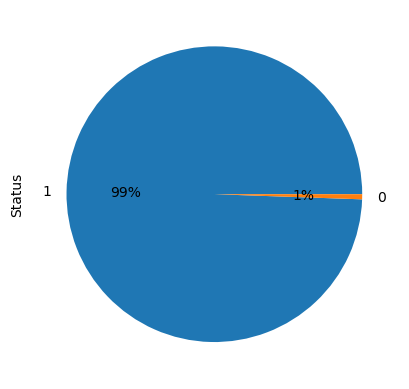

In [180]:
df_6['Status'].value_counts(normalize=True).plot(kind='pie',autopct='%1.0f%%');


In [181]:
df_6['Status'].value_counts()

1    9333
0      52
Name: Status, dtype: int64

### I will search the data to solve imbalance problem

### this data to solve imbalance to the data

In [182]:
df_se=pd.read_csv('/kaggle/input/credit/clean_data.csv')

In [183]:
df_se['Target'].replace({1:0,0:1},inplace=True)

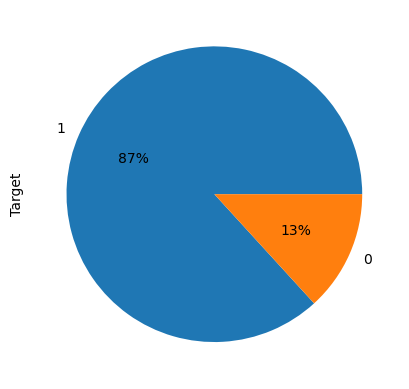

In [184]:
df_se['Target'].value_counts(normalize=True).plot(kind='pie',autopct='%1.0f%%');


In [185]:
df_se.head()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,0
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,1
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,1
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,1
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,1


**this feature different and make the data equal each other**

In [186]:
df_se.drop(['Occupation_type','Phone','Unemployed','Account_length'],inplace=True,axis=1)

In [187]:
df_se

,ID,Gender,Own_car,Own_property,Work_phone,Email,Num_children,Num_family,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Target
0,5008804,1,1,1,1,0,0,2,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,0
1,5008806,1,1,1,0,0,0,2,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,1
2,5008808,0,0,1,0,1,0,1,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1
3,5008812,0,0,1,0,0,0,1,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,1
4,5008815,1,1,1,1,1,0,2,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,5148694,0,0,0,0,0,0,2,180000.0,56.400884,0.542106,Pensioner,Secondary / secondary special,Civil marriage,Municipal apartment,0
9705,5149055,0,0,1,1,0,0,2,112500.0,43.360233,7.375921,Commercial associate,Secondary / secondary special,Married,House / apartment,0
9706,5149729,1,1,1,0,0,0,2,90000.0,52.296762,4.711938,Working,Secondary / secondary special,Married,House / apartment,0
9707,5149838,0,0,1,0,1,0,2,157500.0,33.914454,3.627727,Pensioner,Higher education,Married,House / apartment,0


In [188]:
df_6.drop('Owned_Mobile_Phone',axis=1,inplace=True)

**I rename the future to join the data**

In [189]:
df_se.rename(columns={'Gender':'Applicant_Gender','Own_car':'FLAG_OWN_CAR','Own_property':'Owned_Realty','Work_phone':'Owned_Work_Phone','Email':'Owned_Email','Num_children':'Total_Children'},inplace=True)

In [190]:
df_se.rename(columns={'Num_family':'Total_Family_Members','Total_income':'Total_Income','Age':'Applicant_Age','Years_employed':'Years_of_Working','Income_type':'Income_Type'},inplace=True)

In [191]:
df_se.rename(columns={'Education_type':'Education_Type','Family_status':'Family_Status','Housing_type':'Housing_Type','Target':'Target'},inplace=True)

In [192]:
df_se=df_se[['ID','Target']]
df_se

,ID,Target
0,5008804,0
1,5008806,1
2,5008808,1
3,5008812,1
4,5008815,1
...,...,...
9704,5148694,0
9705,5149055,0
9706,5149729,0
9707,5149838,0


In [193]:
df_6=df_6.set_index('ID').join(df_se.set_index('ID'),on='ID')

In [194]:
df_6

,Applicant_Gender,FLAG_OWN_CAR,Owned_Realty,Total_Children,Total_Income,OCCUPATION_TYPE_NaN,Income_Type,Education_Type,Family_Status,Housing_Type,Owned_Work_Phone,Owned_Email,Total_Family_Members,Applicant_Age,Years_of_Working,IS_EMPLOYED,Status,Target
ID,,,,,,,,,,,,,,,,,,
5008806,0,0,0,0,112500.0,16.0,3.0,1.0,1,1,0,0,2.0,59.0,3.0,1,1,1
5008808,1,1,0,0,270000.0,14.0,4.0,1.0,3,1,0,1,1.0,52.0,8.0,1,1,1
5008812,1,1,0,0,283500.0,6.2,0.0,3.0,2,1,0,0,1.0,62.0,0.0,0,1,1
5008815,0,0,0,0,270000.0,0.0,3.0,3.0,1,1,1,1,2.0,46.0,2.0,1,1,1
5008819,0,0,0,0,135000.0,8.0,4.0,1.0,1,1,0,0,2.0,49.0,3.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5150428,0,0,0,0,112500.0,11.0,3.0,1.0,3,1,1,0,1.0,27.0,5.0,1,1,1
5150451,1,1,0,1,135000.0,11.0,3.0,1.0,1,1,0,0,3.0,45.0,24.0,1,1,1
5150459,1,0,0,1,112500.0,3.0,3.0,1.0,1,1,0,0,3.0,39.0,1.0,1,1,0


In [195]:
df_6.reset_index(drop=True,inplace=True)

In [196]:
df_6

,Applicant_Gender,FLAG_OWN_CAR,Owned_Realty,Total_Children,Total_Income,OCCUPATION_TYPE_NaN,Income_Type,Education_Type,Family_Status,Housing_Type,Owned_Work_Phone,Owned_Email,Total_Family_Members,Applicant_Age,Years_of_Working,IS_EMPLOYED,Status,Target
0,0,0,0,0,112500.0,16.0,3.0,1.0,1,1,0,0,2.0,59.0,3.0,1,1,1
1,1,1,0,0,270000.0,14.0,4.0,1.0,3,1,0,1,1.0,52.0,8.0,1,1,1
2,1,1,0,0,283500.0,6.2,0.0,3.0,2,1,0,0,1.0,62.0,0.0,0,1,1
3,0,0,0,0,270000.0,0.0,3.0,3.0,1,1,1,1,2.0,46.0,2.0,1,1,1
4,0,0,0,0,135000.0,8.0,4.0,1.0,1,1,0,0,2.0,49.0,3.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9380,0,0,0,0,112500.0,11.0,3.0,1.0,3,1,1,0,1.0,27.0,5.0,1,1,1
9381,1,1,0,1,135000.0,11.0,3.0,1.0,1,1,0,0,3.0,45.0,24.0,1,1,1
9382,1,0,0,1,112500.0,3.0,3.0,1.0,1,1,0,0,3.0,39.0,1.0,1,1,0
9383,1,1,0,0,180000.0,2.0,3.0,1.0,1,1,0,0,2.0,49.0,7.0,1,1,1


In [197]:
df_6.drop('Status',axis=1,inplace=True)

**now the 0 equal 13 but still imbalance in data set**

**1 is good and zero is bad**

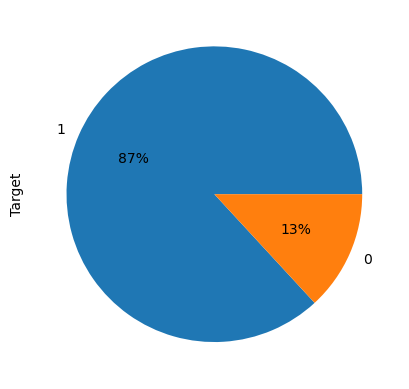

In [198]:
df_6['Target'].value_counts(normalize=True).plot(kind='pie',autopct='%1.0f%%');


In [199]:
pd.options.display.max_rows=30
df_6.isnull().sum()

Applicant_Gender        0
FLAG_OWN_CAR            0
Owned_Realty            0
Total_Children          0
Total_Income            0
OCCUPATION_TYPE_NaN     0
Income_Type             0
Education_Type          0
Family_Status           0
Housing_Type            0
Owned_Work_Phone        0
Owned_Email             0
Total_Family_Members    0
Applicant_Age           0
Years_of_Working        0
IS_EMPLOYED             0
Target                  0
dtype: int64

### I split the data to x and y 

In [200]:
X=df_6.drop('Target',axis=1)
y=df_6['Target']

#### RandomOverSampler

In [201]:
from imblearn.over_sampling import RandomOverSampler
tl = RandomOverSampler(random_state=42)
tl.fit(X, y)
X, y = tl.fit_resample(X, y)

### **Make pca and then Split data to X_train, X_test, y_train, y_test**

In [202]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

pca = PCA(n_components=10)

pca.fit(X)
X_pca = pca.transform(X)

In [203]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.2, random_state = 0)

In [204]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)



## **Afeter that I will over sampling to the class one**

In [205]:
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [207]:
model =XGBClassifier(max_depth=9,min_child_weight=1,subsample = 0.5,random_state=0)

In [208]:
model.fit(X_train, y_train, 
            eval_set=[(X_train, y_train), (X_test, y_test)], 
            early_stopping_rounds=20,eval_metric='auc') 

[0]	validation_0-auc:0.73626	validation_1-auc:0.68264
[1]	validation_0-auc:0.80572	validation_1-auc:0.73047
[2]	validation_0-auc:0.82661	validation_1-auc:0.75447
[3]	validation_0-auc:0.85345	validation_1-auc:0.78321
[4]	validation_0-auc:0.86344	validation_1-auc:0.79396
[5]	validation_0-auc:0.87597	validation_1-auc:0.80477


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-auc:0.87910	validation_1-auc:0.80809
[7]	validation_0-auc:0.90165	validation_1-auc:0.83232
[8]	validation_0-auc:0.91467	validation_1-auc:0.84528
[9]	validation_0-auc:0.92955	validation_1-auc:0.86173
[10]	validation_0-auc:0.93327	validation_1-auc:0.86618
[11]	validation_0-auc:0.93869	validation_1-auc:0.87344
[12]	validation_0-auc:0.94355	validation_1-auc:0.87962
[13]	validation_0-auc:0.94838	validation_1-auc:0.88608
[14]	validation_0-auc:0.95562	validation_1-auc:0.89465
[15]	validation_0-auc:0.96172	validation_1-auc:0.90337
[16]	validation_0-auc:0.96822	validation_1-auc:0.91485
[17]	validation_0-auc:0.97019	validation_1-auc:0.91637
[18]	validation_0-auc:0.97489	validation_1-auc:0.92159
[19]	validation_0-auc:0.97825	validation_1-auc:0.92888
[20]	validation_0-auc:0.98381	validation_1-auc:0.93926
[21]	validation_0-auc:0.98516	validation_1-auc:0.94162
[22]	validation_0-auc:0.98661	validation_1-auc:0.94524
[23]	validation_0-auc:0.98871	validation_1-auc:0.94829
[24]	validatio

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

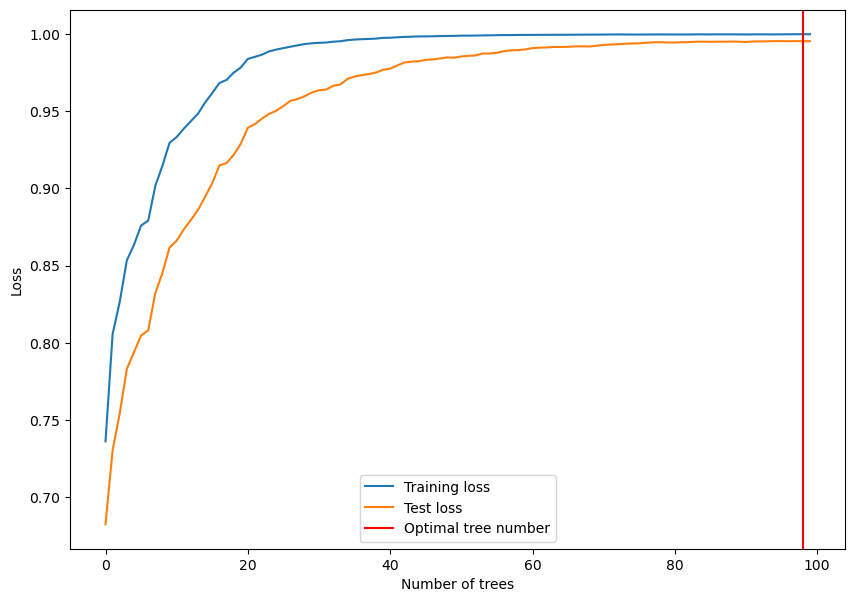

In [209]:
results = model.evals_result()

plt.figure(figsize=(10,7))
plt.plot(results["validation_0"]["auc"], label="Training loss")
plt.plot(results["validation_1"]["auc"], label="Test loss")
plt.axvline(model.best_ntree_limit, color="red", label="Optimal tree number")
plt.xlabel("Number of trees")
plt.ylabel("Loss")
plt.legend();

In [210]:
results

{'validation_0': OrderedDict([('auc',
               [0.7362616327558466,
                0.8057234252118931,
                0.8266111274265108,
                0.8534508363451508,
                0.8634441257389838,
                0.8759689642694315,
                0.8791021872014586,
                0.9016500472963711,
                0.9146735257181513,
                0.9295500978257777,
                0.9332665721287882,
                0.9386856099821089,
                0.9435546438264657,
                0.9483816717215667,
                0.9556205088727427,
                0.9617242919005523,
                0.9682184963022302,
                0.9701937517061611,
                0.9748867908512853,
                0.9782455503437716,
                0.9838050547746763,
                0.9851598495074853,
                0.9866066270410153,
                0.9887084998738528,
                0.9898594370191741,
                0.9908146050441468,
                0.99174282

In [211]:
model.best_ntree_limit


98

In [212]:
y_pred =model.predict(X_test, ntree_limit=98)
y_pred_1 = model.predict(X_train,ntree_limit=98)

/opt/conda/lib/python3.10/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [213]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)

acc_1 = accuracy_score(y_train, y_pred_1)

rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"accuracy_score test: {acc:.2f}")
print(f"accuracy_score train: {acc_1:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1-score: {f1:.2f}")

accuracy_score test: 0.96
accuracy_score train: 0.99
Precision: 0.99
Recall: 0.92
F1-score: 0.96


In [214]:
from sklearn.metrics import confusion_matrix, classification_report
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1614
           1       0.99      0.92      0.96      1647

    accuracy                           0.96      3261
   macro avg       0.96      0.96      0.96      3261
weighted avg       0.96      0.96      0.96      3261



### to get more accuracy in the data make oversampling but I think is not true to solve imbalanced data

In [215]:
X=df_6.drop('Target',axis=1)
y=df_6['Target']


In [216]:
from imblearn.under_sampling import RandomUnderSampler
tl = RandomUnderSampler(sampling_strategy=0.5)
tl.fit(X, y)
X, y = tl.fit_resample(X, y)

In [217]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

pca = PCA(n_components=7)

pca.fit(X)
X_pca = pca.transform(X)

In [218]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [ ]:
model2=XGBClassifier(max_depth=1)

In [ ]:
model2.fit(X_train,y_train)

In [ ]:
y_pred =model2.predict(X_test)
y_pred_1 = model2.predict(X_train)

In [ ]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)

acc_1 = accuracy_score(y_train, y_pred_1)

rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"accuracy_score test: {acc:.2f}")
print(f"accuracy_score train: {acc_1:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1-score: {f1:.2f}")